# A Logistic Regression model to predict diabetes for individuals.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### Exercise 1 : Understanding the problem and Data Collection

In [91]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [94]:
df.nunique()


gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [95]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [96]:
print("Class count:",df["diabetes"].value_counts().rename(index={0: "No Diabetes", 1: "Diabetes"}))
perc = df["diabetes"].value_counts(normalize = True).sort_index()*100
print("\nClass % :", perc.rename(index={0: "Negative", 1: "Positive"}).round(2))

Class count: diabetes
No Diabetes    91500
Diabetes        8500
Name: count, dtype: int64

Class % : diabetes
Negative    91.5
Positive     8.5
Name: proportion, dtype: float64


In [97]:
''' Choosing features and target for model prediction'''
from sklearn.model_selection import train_test_split
feature = df.columns[0:8]  
target = df.columns[8]           
print(feature)
print(target)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')
diabetes


In [98]:
data_features = df[feature]
data_target = df[target]

In [99]:
'''Splitting data into training (70%) and testing sets (30%)'''
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size=0.70, test_size=0.30, random_state=1)
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 70000
Length of X_test is: 30000
Length of y_train is: 70000
Length of y_test is: 30000


### Exercise 2 : Model Picking and Standardization

A suitable model for this problem is Logistic Regression, because the target variable (diabetes) is binary (0 or 1). 

However, other classification models such as Decision Trees, Random Forests, Support Vector Machines (SVM), or K-Nearest Neighbors (KNN) could also be used. These models may capture non-linear relationships between features better than Logistic Regression.

Since models like Logistic Regression and SVM are sensitive to the scale of the features (e.g., age, bmi, and blood_glucose_level have very different ranges), it is important to apply standardization before training. Standardization ensures that all features contribute equally to the model.

In [100]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
cat_columns = ["gender", "smoking_history"]
num_columns = [col for col in data_features.columns if col not in cat_columns]
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_columns),
        ("cat", OneHotEncoder(drop="first"), cat_columns)
    ]
)


### Exercise 3 : Model Training

In [101]:
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre = preprocessor.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pre, y_train) 

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [102]:
''' Prediction'''
pred = model.predict(X_test_pre)

### Exercise 4 : Evaluation Metrics

In [104]:
''' Evaluation '''
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, pred)
print("Accuracy:", acc)



Accuracy: 0.9613


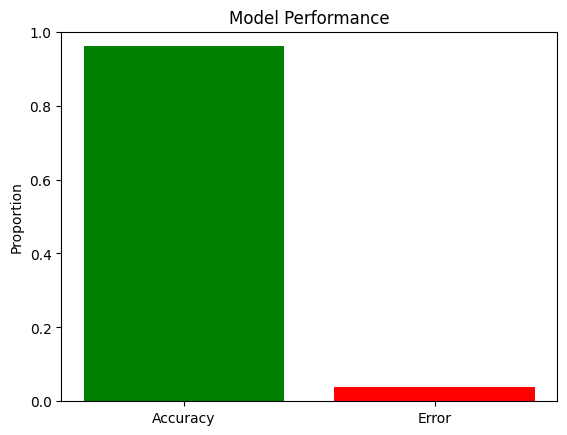

In [ ]:

''' Plotting accuracy vs error'''
error = 1 - acc

plt.bar(["Accuracy", "Error"], [acc, error], color=["green", "red"])
plt.ylim(0, 1)
plt.ylabel("Proportion")
plt.title("Model Performance")
plt.show()



This model has 96% accuracy in predicting whether person has diabetes or not after training on our dataset. Since this dataset is unbalanced we need to look at precision,recall,F1-score and confusion matrix to make proper conclusions.

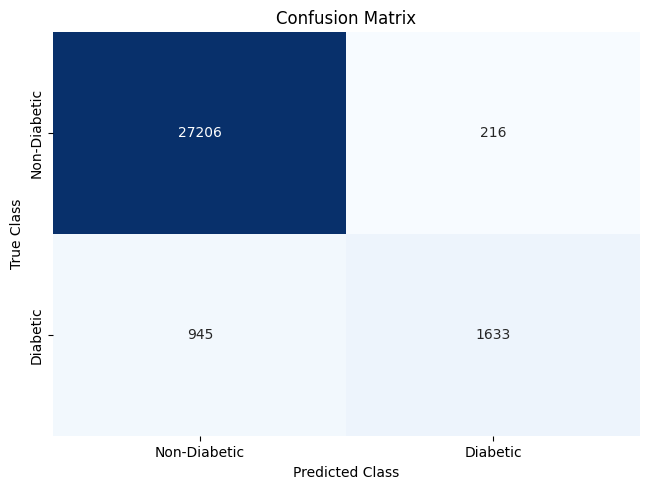

In [110]:
from sklearn.metrics import confusion_matrix
class_names = ['Non-Diabetic', 'Diabetic']
matrix = confusion_matrix(y_test, pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

Conclusion: 
- True Negative (Top-Left): 27206 non-diabetic cases were correctly predicted as non-diabetic
- False Negative (Bottom-Left): 945 diabetic cases were incorrectly predicted as non-diabetic (Type II error).
- True Positive (Bottom-Right): 1633 diabetic cases were correctly identified as diabetic.
- False Positive (Top-Right): 216 non-diabetic were incorrectly identified as diabetic (Type I error).

We can also calculate % of cases which were predicted either correcty or not:

Top-left: 27206/ (27206+216) = 99.2 % of non-diabetics were predicted correctly as non-diabetic
Bottom-right: 1633/ (945+1633) = 63.4 % of diabetics were predicted correctly as diabetic.

The model is extremely good in predicting Non-deabetics but struggles (misses 36.6 %) in predicting diabetics (recall for diabetics 63%). It is very importatant not to miss so many diabetics despite having very high accuracy.

In [112]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, pred, pos_label=1)
recall = recall_score(y_test, pred, pos_label=1)
f1 = f1_score(y_test, pred, pos_label=1)

print(f"Precision (Diabetic): {precision:.2f}")
print(f"Recall (Diabetic): {recall:.2f}")
print(f"F1 Score (Diabetic): {f1:.2f}")

Precision (Diabetic): 0.88
Recall (Diabetic): 0.63
F1 Score (Diabetic): 0.74


Conclusion:
- Precision ≈ 88% -> When the model says “diabetic,” it’s usually right.

- Recall ≈ 63% -> It misses about 37% of real diabetics.

- F1 ≈ 74% -> Balanced score, showing recall needs improvement.


###  Exercise 5 : Visualizing the performance of our model


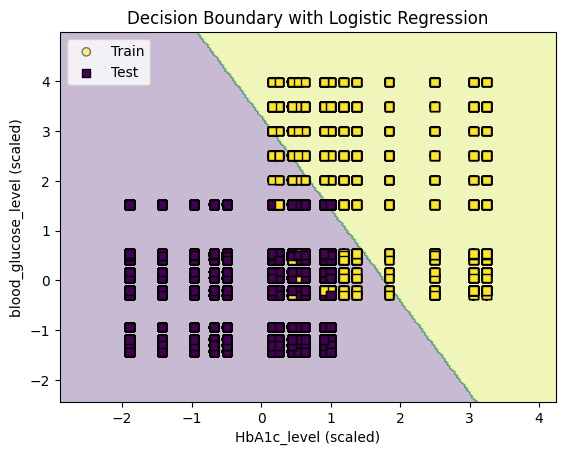

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Select only two features + target
X = df[["HbA1c_level", "blood_glucose_level"]]
y = df["diabetes"]

#  Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the two features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

#  Plot decision boundary
# Create a grid of points covering the feature space
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict the class for each grid point
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision regions
plt.contourf(xx, yy, Z, alpha=0.3)

# Plot training points
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolor='k', marker='o',alpha=0.5, label="Train")
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, edgecolor='k', marker='s',alpha =1.0, label="Test")

plt.xlabel("HbA1c_level (scaled)")
plt.ylabel("blood_glucose_level (scaled)")
plt.title("Decision Boundary with Logistic Regression")
plt.legend()
plt.show()


### Exercise 6 : ROC Curve

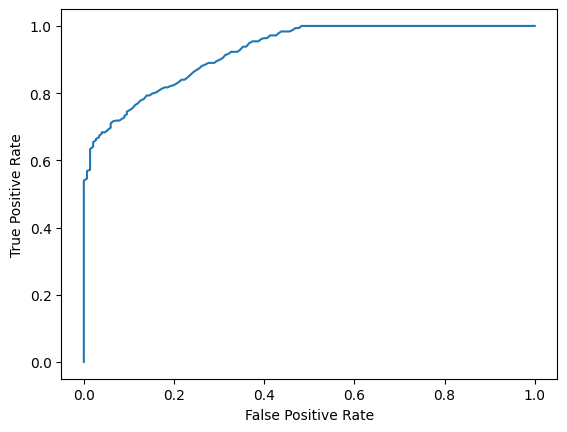

In [10]:
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()